In [48]:
import numpy as np

In [52]:
from PIL import Image
import zipfile
import os
archive = zipfile.ZipFile('lunar_images.zip', 'r')
archive.extractall('')
for i in range(1,4):
    img = Image.open(os.path.join("lunar_images","lunar0{}_raw.jpg".format(i)))
    data = np.array(img, dtype = 'int32')
    data = (255 * (data - data.min())/ (data.max() - data.min())).astype(int)
    res_img = Image.fromarray(data)
    if res_img.mode != 'RGB':
        res_img = res_img.convert('RGB')
    res_img.save("lunar_images/lunar0{}_new.jpg".format(i))


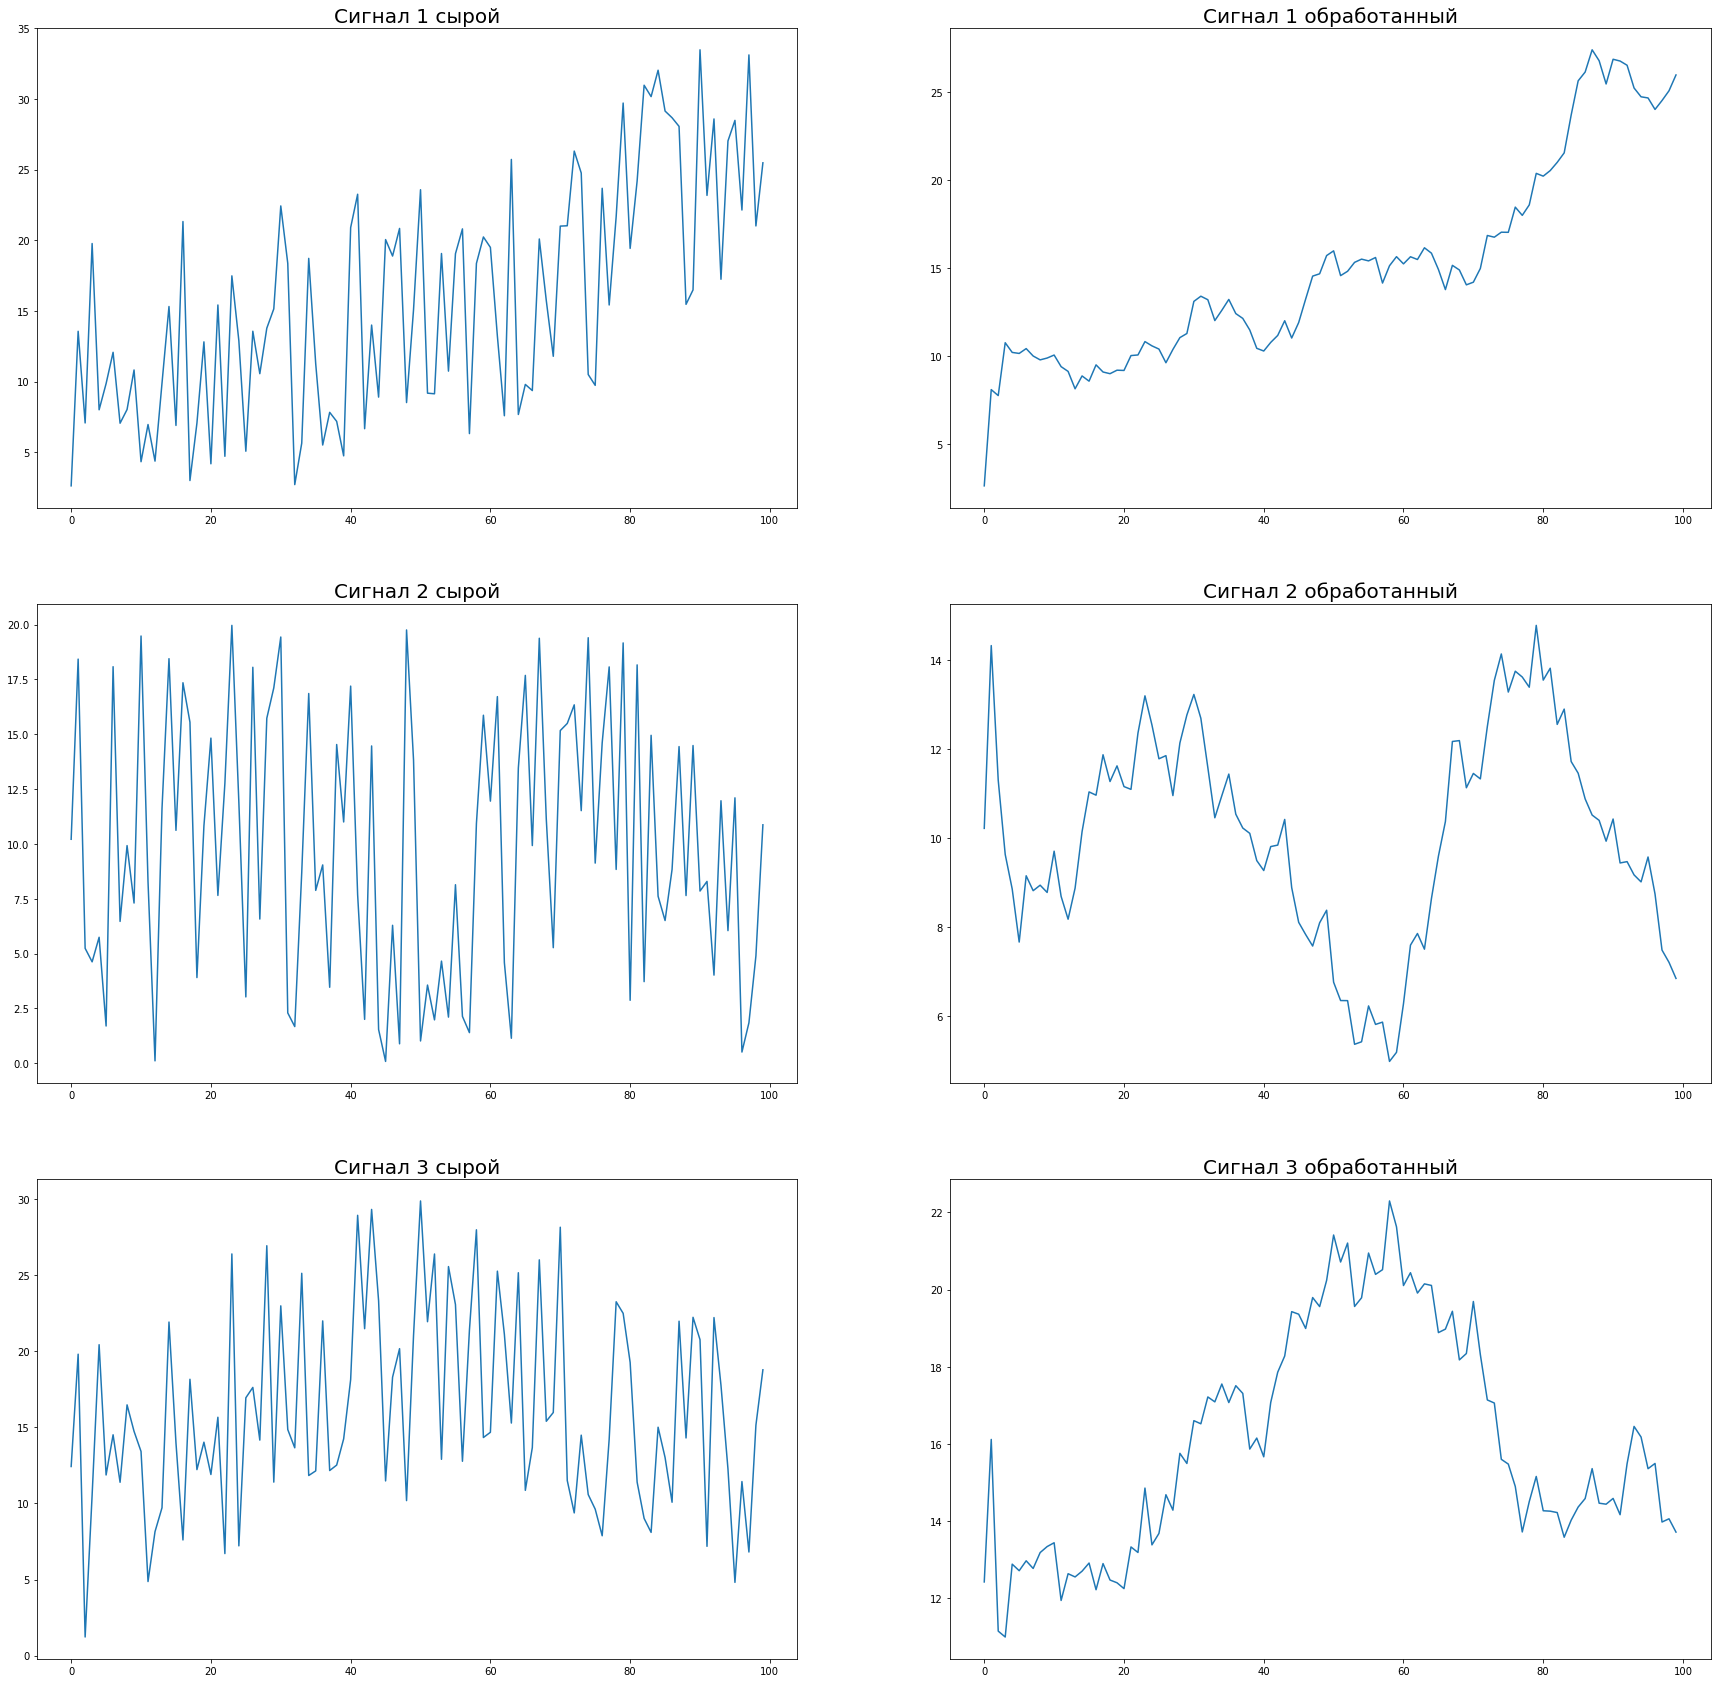

In [50]:
import matplotlib.pyplot as plt

def moving_average(x):
    x1 = np.zeros(9)
    for i in range(1, 10):
        x1[i - 1] =np.sum(x[:i:]) / i
    x2 = (np.convolve(x, np.ones(10), 'valid' ) / 10)
    return np.concatenate((x1, x2))


archive = zipfile.ZipFile('signals.zip', 'r')
fig, ax = plt.subplots(3,2, figsize=[30, 30])
data_all = []
for i in range(1,4):
    moving_averages = []
    imgdata = archive.read("signals/signal0{}.dat".format(i))
    data_all.append(list(map(float, imgdata.decode("utf-8").split())))
    data = np.array(data_all[i - 1])
    moving_averages = moving_average(data)
    ax[i - 1, 0].set_title(f'Сигнал {i} сырой', fontsize = 20)
    ax[i - 1, 0].plot(data)
    ax[i - 1, 1].set_title(f'Сигнал {i} обработанный', fontsize = 20)
    ax[i - 1, 1].plot(moving_averages)
    
    
   
    
fig.savefig('episode-2.png', bbox_inches = 'tight')

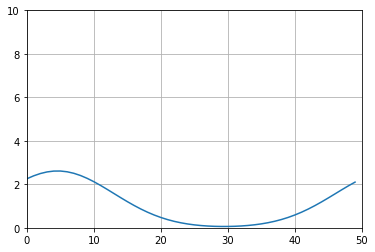

In [51]:
import matplotlib.animation as animation


fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(0, 10)
ax.grid(True)  

data = np.loadtxt('start.dat')
E = np.diag(np.ones(data.size))
A = E + np.roll(-E, 1,0)
line, = ax.plot(data)

def animate(i):
    global data
    data = np.matmul(E - A / 2, data)
    line.set_ydata(data)
    return line,
 
anim = animation.FuncAnimation(fig, animate,frames=255, interval=20)
Writer = animation.PillowWriter(fps=30)
anim.save('episode-3.gif', writer = Writer)
